<a href="https://colab.research.google.com/github/NikitaTsekh/Computer_Vision/blob/main/Roboflow_model_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!nvidia-smi

Wed Jul 19 13:11:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    41W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
!pip install -q roboflow
!!pip install -q ultralytics

[]

In [29]:
from ultralytics import YOLO

import os
from IPython.display import display, Image

In [26]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("nikita-hhukk").project("massage-ball")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.137, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Massage-ball-3 in yolov8:: 100%|██████████| 396/396 [00:00<00:00, 4900.91it/s]


100%|██████████| 6.23M/6.23M [00:00<00:00, 225MB/s]


In [30]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Massage-ball-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [31]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


In [32]:
from IPython import display
display.clear_output()

/content


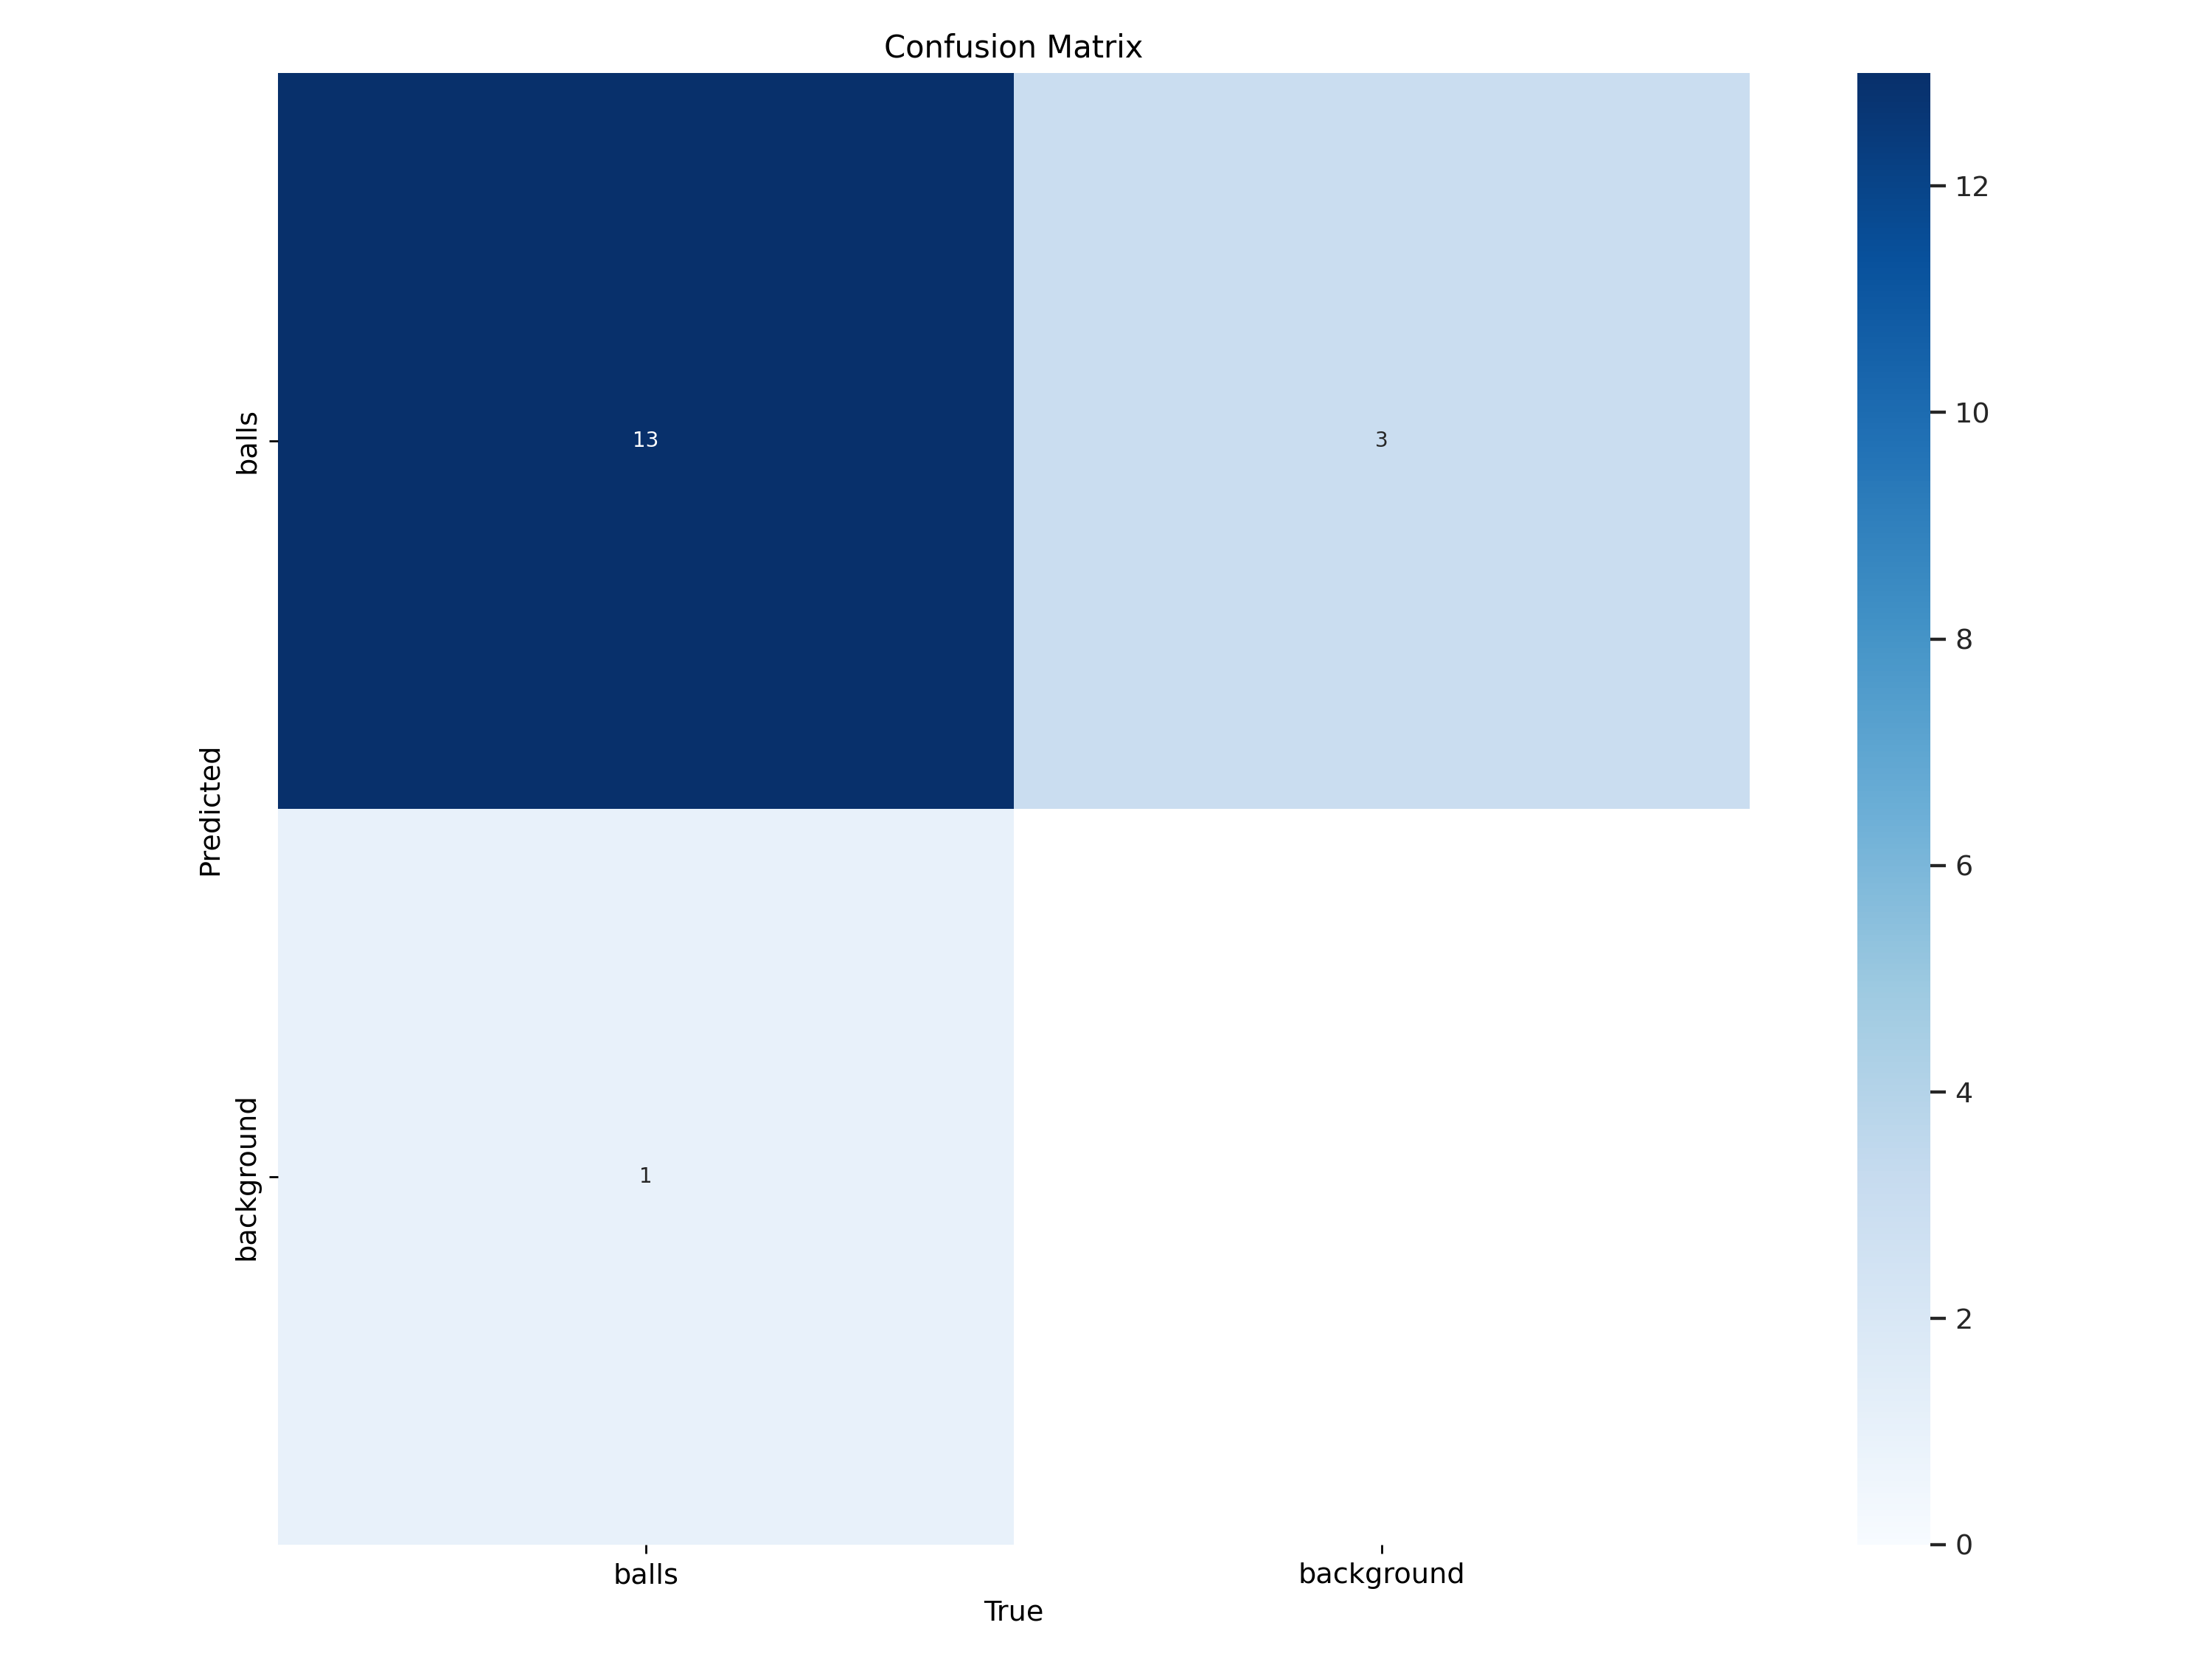

In [41]:
%cd {HOME}
display.Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [42]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/Massage-ball-3/valid/labels.cache... 16 images, 3 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.12it/s]
                   all         16         14      0.994      0.929       0.93      0.872
Speed: 0.3ms preprocess, 12.3ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/val


In [43]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-45-01_JPG.rf.fe026d6ba0fdd1ddc0e327bda3d08883.jpg: 800x800 1 balls, 7.2ms
image 2/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-45-15_JPG.rf.65d441f4402955741e8d88004026d164.jpg: 800x800 1 balls, 6.7ms
image 3/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-46-41_JPG.rf.88f41cf456a542da6a114ef23fbd0baf.jpg: 800x800 1 balls, 6.6ms
image 4/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-48-02_JPG.rf.8c80a96e93b32461b54772a95205caae.jpg: 800x800 3 ballss, 6.2ms
image 5/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-48-10_JPG.rf.26c470f31f559c9a86c90d6a5c97d66a.jpg: 800x800 1 balls, 6.1ms
image 6/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-16-04-35_JPG.rf.4fc8bff57bf65d7c024366c

In [45]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [54]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/7 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-45-15_JPG.rf.65d441f4402955741e8d88004026d164.jpg: 800x800 1 balls, 7.1ms
image 2/7 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-46-41_JPG.rf.88f41cf456a542da6a114ef23fbd0baf.jpg: 800x800 1 balls, 6.7ms
image 3/7 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-48-10_JPG.rf.26c470f31f559c9a86c90d6a5c97d66a.jpg: 800x800 1 balls, 6.2ms
image 4/7 /content/datasets/Massage-ball-3/test/images/2023-07-12-16-04-35_JPG.rf.4fc8bff57bf65d7c024366ce0c8ab0e8.jpg: 800x800 (no detections), 6.0ms
image 5/7 /content/datasets/Massage-ball-3/test/images/2023-07-12-16-04-45_JPG.rf.1f7107771e3fcc9aebe3ca4420822dea.jpg: 800x800 (no detections), 6.4ms
image 6/7 /content/datasets/Massage-ball-3/test/images/2023-07-15-17-32-50_JPG.rf.831a9a1b

In [68]:
%cd {HOME}
model_path = os.path.join('runs/detect/train4/weights/best.pt')

model = YOLO(model_path)


/content


In [61]:
os.path.join(os.getenv('HOME'), 'runs/detect/train4/weights/best.pt')

'/root/runs/detect/train4/weights/best.pt'

In [69]:
source_path='BALL_PREDICT.JPG'
prediction = model.predict(source_path,save=True, imgsz=320, conf=0.5)  # you would need to replace this with actual model prediction function


image 1/1 /content/BALL_PREDICT.JPG: 320x320 1 balls, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict6


https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=3C3EO_2zNChu


https://www.youtube.com/watch?v=wuZtUMEiKWY&t=861s